In [1]:
# Title :- Bank customer churn modeling using the neural network based classifier.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r'C:\Users\HP\Downloads\Churn_Modelling.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\HP\\Downloads\\Churn_Modelling.csv'

In [ ]:
 df.head()

In [7]:
 df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df['RowNumber'].value_counts()

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64

In [10]:
df['RowNumber'].nunique()

10000

In [11]:
df['CustomerId'].nunique()


10000

In [12]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [13]:
 df.shape

(10000, 11)

In [14]:
df.duplicated().sum()

0

In [15]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<Axes: >

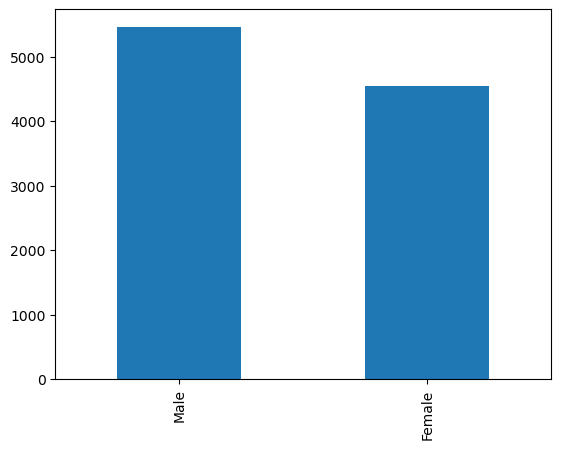

In [16]:
df['Gender'].value_counts().plot(kind='bar')

In [17]:
 grp = df.groupby('Gender')['Exited'].value_counts()
grp

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

<Axes: >

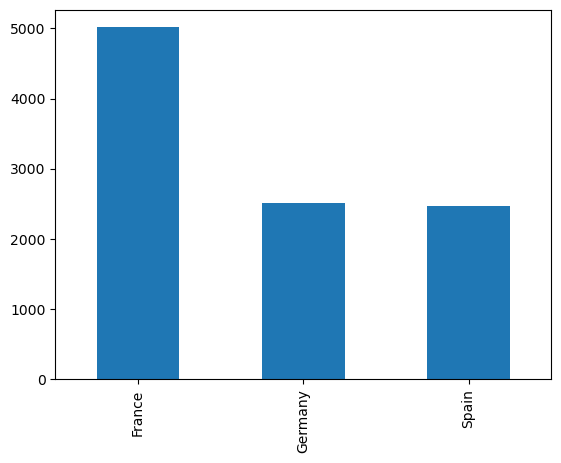

In [18]:
 df['Geography'].value_counts().plot(kind='bar')


In [19]:
df.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [20]:
 df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [21]:
 df.to_csv('analytical_base_table.csv', index=None)

In [22]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [23]:
  df = pd.read_csv('analytical_base_table.csv')

In [24]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [25]:
 x=df.drop(['Exited'],axis=1)
x.shape


(10000, 10)

In [26]:
 x=df.drop(['Exited'],axis=1)
x.shape


(10000, 10)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
 y=df['Exited']
y.shape

(10000,)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [30]:
 x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [31]:
 x_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,753,France,Male,57,7,0.00,1,1,0,159475.08
8392,739,Germany,Male,32,3,102128.27,1,1,0,63981.37


In [32]:
x_train.reset_index(drop=True,inplace=True)

In [33]:
 x_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,753,France,Male,57,7,0.00,1,1,0,159475.08
1,739,Germany,Male,32,3,102128.27,1,1,0,63981.37


In [34]:
 from sklearn.preprocessing import OneHotEncoder

In [35]:
ohe = OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore')

In [36]:
 ohe.fit(x_train[['Gender','Geography']])


OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False,
              sparse_output=False)

In [37]:
x_train_encoded = ohe.transform(x_train[['Gender','Geography']])

In [38]:
 x_train_encoded

array([[1., 0., 0.],
       [1., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 1.],
       [1., 0., 1.]])

In [39]:
 x_train_new = pd.DataFrame(x_train_encoded, columns = ohe.get_feature_names_out(['Gender', 'Geography']))
x_train_new

,Gender_Male,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,1.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,1.0,0.0
...,...,...,...
7995,0.0,0.0,1.0
7996,1.0,0.0,1.0
7997,0.0,0.0,0.0
7998,1.0,0.0,1.0


In [40]:
x_train1 = pd.concat([x_train,x_train_new],axis=1)
x_train1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,753,France,Male,57,7,0.00,1,1,0,159475.08,1.0,0.0,0.0
1,739,Germany,Male,32,3,102128.27,1,1,0,63981.37,1.0,1.0,0.0


In [41]:
 x_train1.drop(['Geography','Gender'],axis=1,inplace=True)
x_train1.shape

(8000, 11)

In [42]:
x_test.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5702,585,France,Male,36,7,0.00,2,1,0,94283.09
3667,525,Germany,Male,33,4,131023.76,2,0,0,55072.93


In [43]:
x_test.reset_index(drop=True,inplace=True)
x_test.head(2)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,585,France,Male,36,7,0.00,2,1,0,94283.09
1,525,Germany,Male,33,4,131023.76,2,0,0,55072.93


In [44]:
ohe.fit(x_test[['Gender','Geography']])
x_test_encoded = ohe.transform(x_test[['Gender','Geography']])
x_test_new = pd.DataFrame(x_test_encoded,columns=ohe.get_feature_names_out(['Gender','Geography']))
x_test_new

,Gender_Male,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,1.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
1995,1.0,0.0,0.0
1996,1.0,1.0,0.0
1997,0.0,1.0,0.0
1998,1.0,0.0,0.0


In [45]:
x_test1 = pd.concat([x_test,x_test_new],axis=1)
x_test1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,585,France,Male,36,7,0.00,2,1,0,94283.09,1.0,0.0,0.0
1,525,Germany,Male,33,4,131023.76,2,0,0,55072.93,1.0,1.0,0.0


In [46]:
x_test1.drop(['Geography','Gender'],axis=1,inplace=True)
x_test1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,585,36,7,0.00,2,1,0,94283.09,1.0,0.0,0.0
1,525,33,4,131023.76,2,0,0,55072.93,1.0,1.0,0.0
2,557,40,4,0.00,2,0,1,105433.53,0.0,0.0,1.0
3,639,34,5,139393.19,2,0,0,33950.08,1.0,0.0,1.0
4,640,34,3,77826.80,1,1,1,168544.85,0.0,0.0,1.0


In [47]:
 from sklearn.preprocessing import MinMaxScaler

In [48]:
sc = MinMaxScaler()
sc.fit(x_train1)
x_train1_sc = sc.transform(x_train1)
x_test1_sc = sc.transform(x_test1)

In [49]:
x_train1_sc.shape

(8000, 11)

In [50]:
 type(x_train1_sc)


numpy.ndarray

In [51]:
import tensorflow.keras as tk

ModuleNotFoundError: No module named 'tensorflow'

In [52]:
model = tk.Sequential()

NameError: name 'tk' is not defined

In [53]:
# Adding the input layer
model.add(tk.layers.Input(shape=(11,)))
# Adding the first hidden layer
model.add(tk.layers.Dense(units=6,activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer
model.add(tk.layers.Dense(units=6,activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer
model.add(tk.layers.Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

NameError: name 'model' is not defined

In [54]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['Precision','accuracy'])

NameError: name 'model' is not defined

In [55]:
model.summary()

NameError: name 'model' is not defined

In [56]:
x_train1_sc.shape,x_test1_sc.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [57]:
import time


In [58]:
# Training the model
start = time.time()
model.fit(x=x_train1_sc,
y=y_train,
epochs=20,
batch_size=32,
validation_data=(x_test1_sc,y_test))
end=time.time()
print(end-start)

NameError: name 'model' is not defined